In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u

In [2]:
sol_to_earth = 332946.078
AU = 1.496e+13 #cm
M_sun = 1.989e+33 #g
G = 6.6743* 10**(-11) #N⋅m2/kg2

m_pl = 2.7932451e-8 * M_sun / 10**3 # kg, Mass of each planetesimal
m_emb = 2.7932451e-7 * M_sun / 10**3  # solMass, Mass of each planetary embryo
r_emb = 2.39e-5 * AU * 10**(-2) #m, radius of embryo
r_pl = 1.11e-5 * AU * 10**(-2) #m, radius of planetesimal
m_min = 0.5 * m_pl

In [17]:
r = 2 *AU*10**(-2)
v_rel = np.sqrt((G*M_sun/10**3)/r) #m/s
#theta = np.pi/6
theta = np.linspace(0, np.pi/2 - np.pi/50, 100)
M_t = m_emb
M_p = m_pl
R_t = r_emb
R_p = r_pl
M_tot = M_t + M_p
R_tot = R_t + R_p
b = R_tot * np.sin(theta)
x_rel = R_tot * np.cos(theta)
v_esc = np.sqrt(2*G*M_tot/R_tot)
v_i = np.sqrt(v_rel**2 - 2*G*M_tot*(1/x_rel - 1/R_tot))

In [37]:
v_esc

3947.174238072825

First step, compute vi/vesc and b/b_crit

In [22]:
print("v_i/v_esc = ", v_i/v_esc)
print("b/b_crit = ", b/R_t)

v_i/v_esc =  [5.3364588  5.33644793 5.33641531 5.33636089 5.33628462 5.33618641
 5.33606613 5.33592365 5.3357588  5.33557138 5.33536116 5.3351279
 5.33487131 5.33459108 5.33428687 5.33395829 5.33360495 5.3332264
 5.33282215 5.3323917  5.33193448 5.3314499  5.33093732 5.33039605
 5.32982536 5.32922447 5.32859254 5.32792867 5.32723192 5.32650128
 5.32573566 5.32493391 5.3240948  5.32321703 5.3222992  5.32133982
 5.32033731 5.31928998 5.31819601 5.31705349 5.31586035 5.31461438
 5.31331324 5.31195439 5.31053514 5.30905257 5.30750359 5.30588484
 5.30419272 5.30242335 5.30057257 5.29863585 5.29660832 5.29448472
 5.29225931 5.2899259  5.28747774 5.28490747 5.2822071  5.27936786
 5.27638016 5.27323349 5.26991629 5.26641581 5.26271798 5.25880724
 5.25466629 5.25027589 5.24561457 5.24065827 5.23537997 5.22974924
 5.22373163 5.217288   5.21037375 5.20293776 5.19492119 5.18625599
 5.17686296 5.16664944 5.15550627 5.14330399 5.12988783 5.11507128
 5.09862746 5.08027754 5.05967501 5.03638374 5.0098

Now let's compute mass of largest remnant.

In [23]:
Cstar = 1.8
rho_1 = 1000
R_1 = (M_tot/(4/3*np.pi*rho_1))**(1/3)
mu = (M_t*M_p)/(M_tot)
gamma = M_p/M_t
l = R_tot*(1-np.sin(theta)) #Childs and Steffen 2022
alpha = (3*R_p*l**2 - l**3)/(4*R_p**3) #Childs and Steffen 2022
mu_alpha = alpha*M_p*M_t/(M_t + alpha*M_p)
Q = (mu * v_i**2)/(2*M_tot)
Q_0 = 0.8 * Cstar * np.pi * rho_1 * G * R_1**2
Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)

/tmp/ipykernel_11959/254906881.py:11: RuntimeWarning: invalid value encountered in power
  Q_star = Q_0 * ((1+gamma)**2/(4*gamma)) * (mu/mu_alpha)**(3/2)


In [34]:
merge_thresh = 2 * m_min/M_tot

Q_esc = (mu * v_esc**2)/(2*M_tot)

In [39]:
Q_esc/Q_star

array([           nan,            nan,            nan,            nan,
       7.19850267e-04, 2.25490361e-03, 4.09129586e-03, 6.05978069e-03,
       8.06502984e-03, 1.00460736e-02, 1.19617857e-02, 1.37838221e-02,
       1.54926260e-02, 1.70749460e-02, 1.85221904e-02, 1.98292859e-02,
       2.09938579e-02, 2.20156263e-02, 2.28959497e-02, 2.36374773e-02,
       2.42438765e-02, 2.47196194e-02, 2.50698119e-02, 2.53000563e-02,
       2.54163386e-02, 2.54249361e-02, 2.53323403e-02, 2.51451918e-02,
       2.48702246e-02, 2.45142187e-02, 2.40839578e-02, 2.35861926e-02,
       2.30276077e-02, 2.24147923e-02, 2.17542126e-02, 2.10521874e-02,
       2.03148656e-02, 1.95482047e-02, 1.87579522e-02, 1.79496274e-02,
       1.71285055e-02, 1.62996026e-02, 1.54676633e-02, 1.46371483e-02,
       1.38122252e-02, 1.29967599e-02, 1.21943105e-02, 1.14081226e-02,
       1.06411263e-02, 9.89593578e-03, 9.17485022e-03, 8.47985668e-03,
       7.81263517e-03, 7.17456537e-03, 6.56673524e-03, 5.98995133e-03,
      

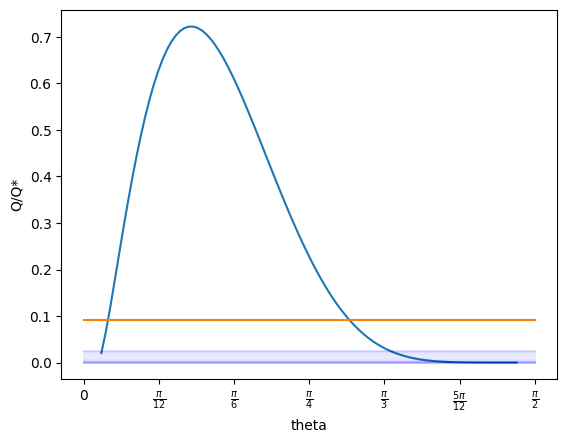

In [42]:
plt.plot(theta, Q/Q_star)

ticks = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/3+np.pi/12, np.pi/2]  # Desired tick positions
tick_labels = [r"$0$", r"$\frac{\pi}{12}$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{3}$",r"$\frac{5\pi}{12}$", r"$\frac{\pi}{2}$"]  # Labels

plt.xticks(ticks, tick_labels)
plt.plot([0,np.pi/2], [merge_thresh,merge_thresh])
plt.plot([0,np.pi/2], [Q_esc/Q_star,Q_esc/Q_star], alpha=0.01, color = 'blue')
plt.xlabel('theta')
plt.ylabel('Q/Q*')
plt.show()

In [8]:
M_lr = 0.1 * M_tot * (Q/(1.8*Q_star))**(-3/2)
M_r = M_tot - M_lr
n_frag = M_r/m_min
print(n_frag)

10.815930736980095


In [9]:
#phi = theta
phi = np.linspace(0, np.pi/2, 1000)
c1 = 2.43
c2 = -0.0408
c3 = 1.86
c4 = 1.08
Gamma = ((1-gamma)/(1+gamma))**2
v_cr = v_esc * (  c1*Gamma*(1-np.sin(phi))**(5/2) + c2*Gamma + c3*Gamma*(1-np.sin(phi))**(5/2) + c4  )

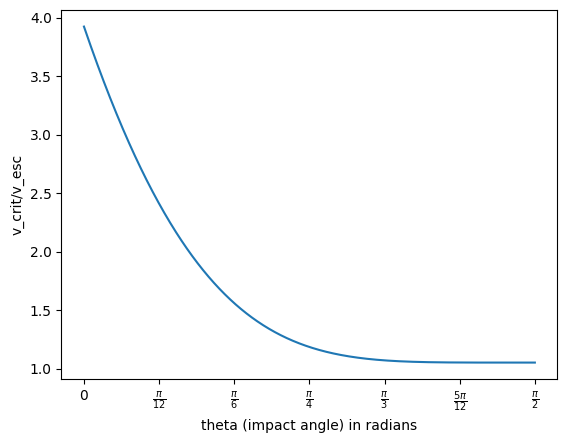

In [10]:
plt.plot(phi, v_cr/v_esc)

plt.xlabel('theta (impact angle) in radians')
plt.ylabel('v_crit/v_esc')

ticks = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/3+np.pi/12, np.pi/2]  # Desired tick positions
tick_labels = [r"$0$", r"$\frac{\pi}{12}$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{3}$",r"$\frac{5\pi}{12}$", r"$\frac{\pi}{2}$"]  # Labels

plt.xticks(ticks, tick_labels)

plt.show()

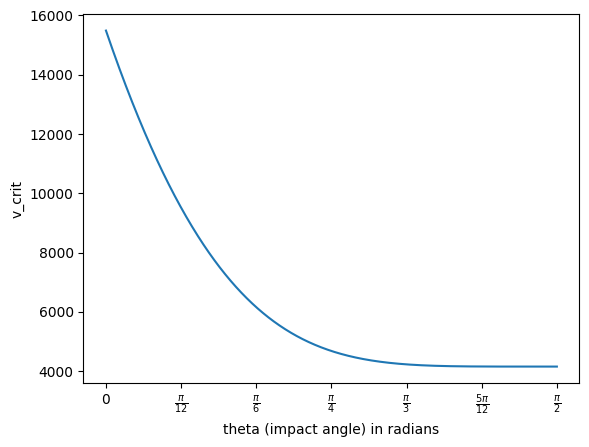

In [12]:
plt.plot(phi, v_cr)

plt.xlabel('theta (impact angle) in radians')
plt.ylabel('v_crit')

ticks = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/3, np.pi/3+np.pi/12, np.pi/2]  # Desired tick positions
tick_labels = [r"$0$", r"$\frac{\pi}{12}$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{4}$", r"$\frac{\pi}{3}$",r"$\frac{5\pi}{12}$", r"$\frac{\pi}{2}$"]  # Labels

plt.xticks(ticks, tick_labels)

plt.show()